In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Apply the default theme
sns.set_theme()
sns.set_style('whitegrid')
sns.set_context('paper')


In [2]:
# Load data
df = pd.read_csv('../data/sampling.csv')
df_jpeg = pd.read_csv('../data/jpeg.csv')

# _x = sampling, _y = jpeg
df_merged = pd.merge(df, df_jpeg, on='file_name')

df_merged[df_merged['file_name'] == 'test_small'].sort_values(['compression_ratio_x'])


,file_name,file_size_original_x,file_size_transcoded_x,compression_ratio_x,transcoding_time_x,downsampling_algorithm,upsampling_algorithm,file_size_original_y,file_size_transcoded_y,compression_ratio_y,transcoding_time_y
12,test_small,974331,4268185,4.380631,1245,ApproxBiLinear,CatmullRom,974331,155999,0.160109,59
10,test_small,974331,4321936,4.435799,1560,CatmullRom,CatmullRom,974331,155999,0.160109,59
4,test_small,974331,4533948,4.653396,1373,ApproxBiLinear,ApproxBiLinear,974331,155999,0.160109,59
6,test_small,974331,4533948,4.653396,1263,ApproxBiLinear,BiLinear,974331,155999,0.160109,59
9,test_small,974331,4563906,4.684143,1490,BiLinear,CatmullRom,974331,155999,0.160109,59
7,test_small,974331,4567407,4.687737,1721,CatmullRom,ApproxBiLinear,974331,155999,0.160109,59
15,test_small,974331,4567407,4.687737,1638,CatmullRom,BiLinear,974331,155999,0.160109,59
0,test_small,974331,4589554,4.710467,1125,ApproxBiLinear,NearestNeighbor,974331,155999,0.160109,59
14,test_small,974331,4597788,4.718918,1453,CatmullRom,NearestNeighbor,974331,155999,0.160109,59
11,test_small,974331,4629544,4.751511,1315,BiLinear,NearestNeighbor,974331,155999,0.160109,59


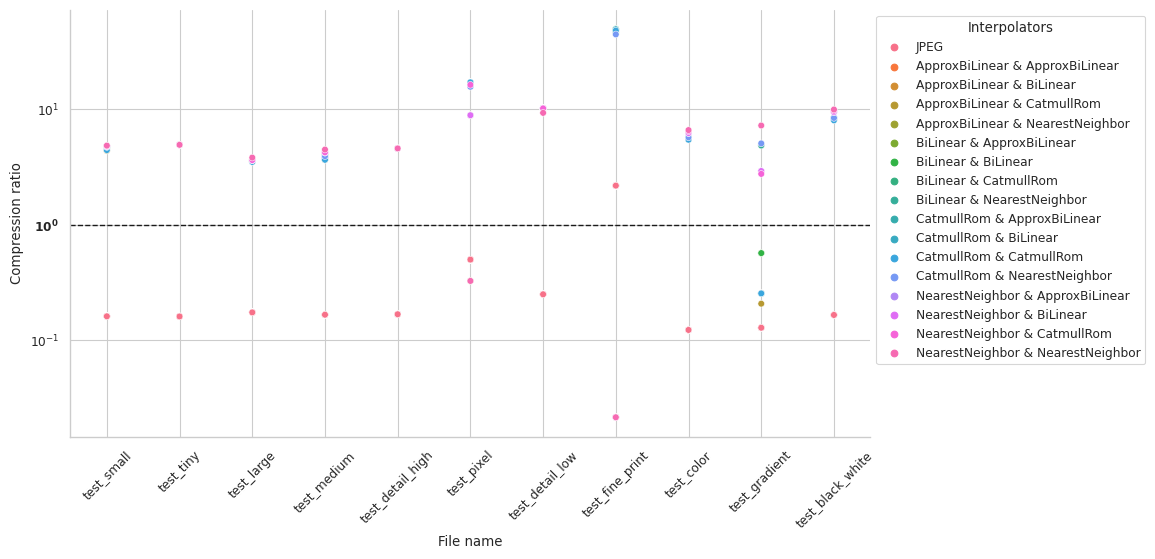

In [7]:
# Compression ratio
df_sorted = df_merged.sort_values(
    ['downsampling_algorithm', 'upsampling_algorithm'])

# 'Plain' run
# df_first = df_sorted[(df_sorted['downsampling_algorithm'] == 'ApproxBiLinear') & (df_sorted['upsampling_algorithm'] == 'ApproxBiLinear')].loc[:, ('file_name', 'compression_ratio_x')].rename(
#    columns={'compression_ratio_x': 'c'})
#df_first['class'] = 'plain_run'

# JPEG
df_second = df_sorted.loc[:, ('file_name', 'compression_ratio_y')].rename(
    columns={'compression_ratio_y': 'c'})
df_second['class'] = 'jpeg'

# Do this hacky filtering, to get everything apart from 'plain' run
#[(df_sorted['downsampling_algorithm'] != 'ApproxBiLinear') | (df_sorted['upsampling_algorithm'] != 'ApproxBiLinear')]
df_third = df_sorted.loc[:, ('file_name', 'compression_ratio_x', 'upsampling_algorithm', 'downsampling_algorithm')].rename(
    columns={'compression_ratio_x': 'c'})
df_third['class'] = df_third['downsampling_algorithm'] + \
    '_' + df_third['upsampling_algorithm']

# Concatenate data frames
df_concat = pd.concat([df_second, df_third])

# CatmullRomeate a visualization
g = sns.relplot(
    x='file_name',
    y='c',
    data=df_concat,
    hue='class',
    aspect=16/9,
    facet_kws={'legend_out': False},
)

# Bold 10⁰
yticklabels = g.ax.get_yticklabels()
yticklabels[3].set_fontweight('bold')
g.set_yticklabels(yticklabels)

# Draw line through 10⁰
g.ax.axhline(y=10**0, color='k', linestyle='--', linewidth=1)

# ticks = [0.01, 0.1, 1, 10, 100]
g.set(xlabel='File name', ylabel='Compression ratio',
      yscale='log')#, yticks=ticks, yticklabels=ticks)
# g.set(xlabel='File name', ylabel='Compression ratio', yscale='log')

legend = g.axes.flat[0].get_legend()
legend.set_bbox_to_anchor((1, 1))
legend.set_title('Interpolators')
for t, l in zip(legend.texts, ['JPEG', 'ApproxBiLinear & ApproxBiLinear', 'ApproxBiLinear & BiLinear', 'ApproxBiLinear & CatmullRom', 'ApproxBiLinear & NearestNeighbor', 'BiLinear & ApproxBiLinear', 'BiLinear & BiLinear', 'BiLinear & CatmullRom', 'BiLinear & NearestNeighbor', 'CatmullRom & ApproxBiLinear', 'CatmullRom & BiLinear', 'CatmullRom & CatmullRom', 'CatmullRom & NearestNeighbor', 'NearestNeighbor & ApproxBiLinear', 'NearestNeighbor & BiLinear', 'NearestNeighbor & CatmullRom', 'NearestNeighbor & NearestNeighbor']):
    t.set_text(l)

plt.xticks(rotation=45)

plt.show()


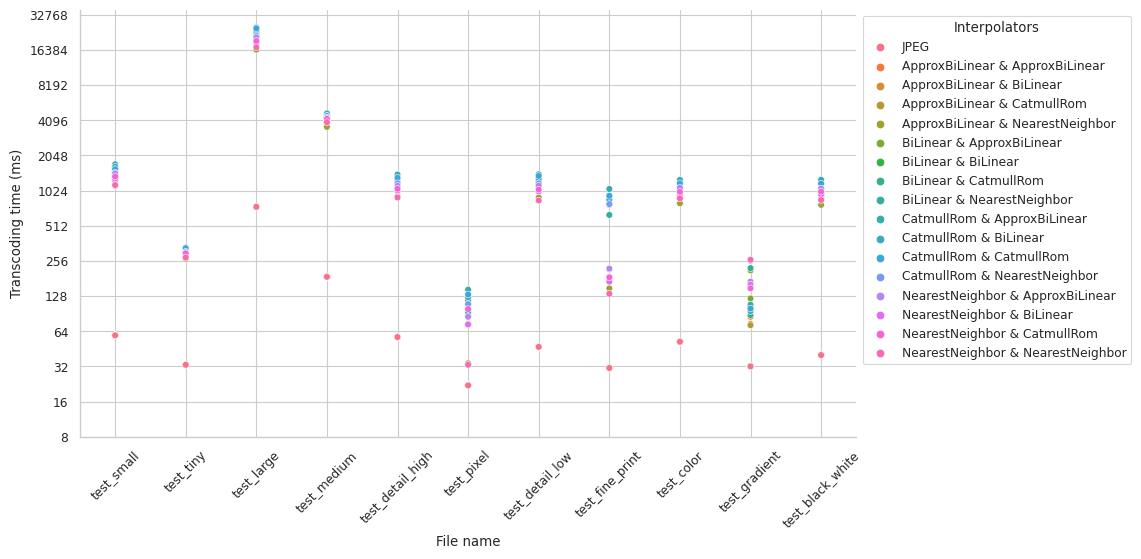

In [22]:
# Transcoding time
df_sorted = df_merged.sort_values(
    ['downsampling_algorithm', 'upsampling_algorithm'])

df_second = df_sorted.loc[:, ('file_name', 'transcoding_time_y')].rename(
    columns={'transcoding_time_y': 't'})
df_second['class'] = 'jpeg'

df_third = df_sorted.loc[:, ('file_name', 'transcoding_time_x', 'upsampling_algorithm', 'downsampling_algorithm')].rename(
    columns={'transcoding_time_x': 't'})
df_third['class'] = df_third['downsampling_algorithm'] + \
    '_' + df_third['upsampling_algorithm']

# Concatenate data frames
df_concat = pd.concat([df_second, df_third])

# Create a visualization
g = sns.relplot(
    x='file_name',
    y='t',
    hue='class',
    data=df_concat,
    aspect=16/9,
    facet_kws={'legend_out': False},
)

legend = g.axes.flat[0].get_legend()
legend.set_title('Interpolators')
legend.set_bbox_to_anchor((1, 1))
for t, l in zip(legend.texts, ['JPEG', 'ApproxBiLinear & ApproxBiLinear', 'ApproxBiLinear & BiLinear', 'ApproxBiLinear & CatmullRom', 'ApproxBiLinear & NearestNeighbor', 'BiLinear & ApproxBiLinear', 'BiLinear & BiLinear', 'BiLinear & CatmullRom', 'BiLinear & NearestNeighbor', 'CatmullRom & ApproxBiLinear', 'CatmullRom & BiLinear', 'CatmullRom & CatmullRom', 'CatmullRom & NearestNeighbor', 'NearestNeighbor & ApproxBiLinear', 'NearestNeighbor & BiLinear', 'NearestNeighbor & CatmullRom', 'NearestNeighbor & NearestNeighbor']):
    t.set_text(l)

# ticks = [2**x for x in range(3, 16)]
g.set(xlabel='File name', ylabel='Transcoding time (ms)',
      yscale='log')#, yticks=ticks, yticklabels=ticks)

plt.xticks(rotation=45)

plt.show()
